# 2015 Loan Data Random Forest

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
y2015 = pd.read_csv('LoanStats3d.csv', header=1)
y2015.head()

C:\Users\etallen127\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401,72868139.0,16000.0,16000.0,16000.0,60 months,14.85%,379.39,C,C5,...,0.0,2.0,78.9,0.0,0.0,2.0,298100.0,31329.0,281300.0,13400.0
1,68354783,73244544.0,9600.0,9600.0,9600.0,36 months,7.49%,298.58,A,A4,...,0.0,2.0,100.0,66.7,0.0,0.0,88635.0,55387.0,12500.0,75635.0
2,68466916,73356753.0,25000.0,25000.0,25000.0,36 months,7.49%,777.55,A,A4,...,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0
3,68466961,73356799.0,28000.0,28000.0,28000.0,36 months,6.49%,858.05,A,A2,...,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0
4,68495092,73384866.0,8650.0,8650.0,8650.0,36 months,19.89%,320.99,E,E3,...,0.0,12.0,100.0,50.0,1.0,0.0,38998.0,18926.0,2750.0,18248.0


In [3]:
# Convert ID and Interest Rate to numeric.
y2015['id'] = pd.to_numeric(y2015['id'], errors='coerce')
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')

# Drop other columns with many unique variables
y2015.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
            'sub_grade', 'addr_state', 'desc'], 1, inplace=True)

In [4]:
y2015 = y2015[:-2]

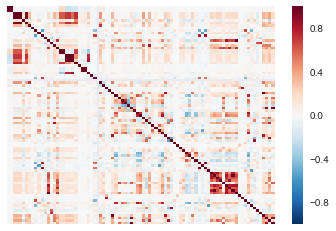

In [7]:
sns.heatmap(y2015.corr(),yticklabels=False,xticklabels=False)

In [5]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
Y = y2015['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

In [ ]:
cross_val_score(rfc, X, Y, cv=10)

In [6]:
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_predict
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.feature_selection import tests
from sklearn.linear_model import LinearRegression

C:\Users\etallen127\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
# spliting our data into test and training sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

In [8]:
# scaling our X training data to prep for pca
ss = StandardScaler().fit_transform(X_train)

In [9]:
# using pca to select 50 components from X's features
sklearn_pca = PCA(n_components=50)

# fitting our x training data to pca
Y_sklearn = sklearn_pca.fit_transform(ss)

# adding results to a new data frame
X_PCA = pd.DataFrame(Y_sklearn)

In [10]:
# using pca to select 20 components from X's features
sklearn_pca2 = PCA(n_components=20)

# fitting our x training data to pca
Y_sklearn2 = sklearn_pca.fit_transform(X_PCA)

# adding results to a new data frame
X_PCA2 = pd.DataFrame(Y_sklearn2)

In [11]:
# using pca to select 10 components from X's features
sklearn_pca3 = PCA(n_components=10)

# fitting our x training data to pca
Y_sklearn3 = sklearn_pca.fit_transform(X_PCA2)

# adding results to a new data frame
X_PCA3 = pd.DataFrame(Y_sklearn3)

In [12]:
# # calculating score for 10 folds with 10 components
cross_val_score(rfc, X_PCA3, Y_train, cv=10)

array([ 0.95274602,  0.95261033,  0.95179456,  0.95115001,  0.95254088,
        0.95349074,  0.95318066,  0.95440204,  0.95484002,  0.95314356])

After calculating the original 111 features down to 50 components, we were then able to take reduce our components down to 20, then again to 10 and maintain 95% accuracy. Lets see how much more we can reduce.

In [12]:
# using pca to select 5 components from X's features
sklearn_pca4 = PCA(n_components=5)

# fitting our x training data to pca
Y_sklearn4 = sklearn_pca.fit_transform(X_PCA3)

# adding results to a new data frame
X_PCA4 = pd.DataFrame(Y_sklearn4)

In [17]:
# making sure that 5 components hasnt lost accuracy
cross_val_score(rfc, X_PCA4, Y_train, cv=3)

array([ 0.95131136,  0.95135108,  0.95156431])

In [13]:
# using pca to select 3 components from X's features
sklearn_pca5= PCA(n_components=3)

# fitting our x training data to pca
Y_sklearn5 = sklearn_pca.fit_transform(X_PCA4)

# adding results to a new data frame
X_PCA5 = pd.DataFrame(Y_sklearn5)

In [19]:
# calculating score for 10 folds with 3 components
cross_val_score(rfc, X_PCA5, Y_train, cv=10)

array([ 0.95356016,  0.95288171,  0.95125178,  0.95172671,  0.9527105 ,
        0.95233734,  0.95284139,  0.95379135,  0.95270247,  0.95402572])

the model still has 95% accuracy at 3 components

In [14]:
# using pca to select 2 components from X's features
sklearn_pca6= PCA(n_components=2)

# fitting our x training data to pca
Y_sklearn6 = sklearn_pca.fit_transform(X_PCA5)

# adding results to a new data frame
X_PCA6 = pd.DataFrame(Y_sklearn6)

In [15]:
# calculating score for 10 folds with 2 components
cross_val_score(rfc, X_PCA6, Y_train, cv=10)

array([ 0.95203528,  0.95145697,  0.95389782,  0.9531144 ,  0.9543018 ,
        0.95484462,  0.95304655,  0.95168951,  0.95257158,  0.95266854])

In [16]:
# using pca to select single components from X's features
sklearn_pca7= PCA(n_components=1)

# fitting our x training data to pca
Y_sklearn7 = sklearn_pca.fit_transform(X_PCA6)

# adding results to a new data frame
X_PCA7 = pd.DataFrame(Y_sklearn7)

In [17]:
# calculating score for 10 folds with a single components
cross_val_score(rfc, X_PCA7, Y_train, cv=10).mean()

0.953410516230492

After 7 rounds of filtering we were able to reduce our original 111 features down to a single component while maintaining 95% for our random forest classifier model 

In [32]:
# removing payment columns and outstanding principle to see how important features are
X = y2015.drop(y2015[['loan_status', 'out_prncp','pymnt_plan','last_pymnt_amnt','total_pymnt']], axis=1)
Y = y2015['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

In [33]:
cross_val_score(rfc, X_train, Y_train, cv=10)

array([ 0.98069812,  0.97998575,  0.9800536 ,  0.97988262,  0.98073074,
        0.98052719,  0.98076466,  0.98042475,  0.98137278,  0.98093105])

After dropping the payment columns and outstanding principle column, our model has improved to 98% accuracy, which shows we can preform the same pca testing and maintain the models accuracy.

In [34]:
ss = StandardScaler().fit_transform(X_train)

In [35]:
# using pca to select 50 components from X's features
sklearn_pca = PCA(n_components=50)

# fitting our x training data to pca
Y_sklearn = sklearn_pca.fit_transform(ss)

# adding results to a new data frame
X_PCA = pd.DataFrame(Y_sklearn)

In [36]:
# using pca to select 50 components from X's features
sklearn_pca2 = PCA(n_components=20)

# fitting our x training data to pca
Y_sklearn2 = sklearn_pca.fit_transform(X_PCA)

# adding results to a new data frame
X_PCA2 = pd.DataFrame(Y_sklearn2)

In [37]:
# using pca to select 50 components from X's features
sklearn_pca3 = PCA(n_components=10)

# fitting our x training data to pca
Y_sklearn3 = sklearn_pca.fit_transform(X_PCA2)

# adding results to a new data frame
X_PCA3 = pd.DataFrame(Y_sklearn3)

In [38]:
# using pca to select 50 components from X's features
sklearn_pca4 = PCA(n_components=5)

# fitting our x training data to pca
Y_sklearn4 = sklearn_pca.fit_transform(X_PCA3)

# adding results to a new data frame
X_PCA4 = pd.DataFrame(Y_sklearn4)

In [39]:
# using pca to select 50 components from X's features
sklearn_pca5 = PCA(n_components=3)

# fitting our x training data to pca
Y_sklearn5 = sklearn_pca.fit_transform(X_PCA4)

# adding results to a new data frame
X_PCA5 = pd.DataFrame(Y_sklearn5)

In [40]:
# using pca to select 50 components from X's features
sklearn_pca6 = PCA(n_components=2)

# fitting our x training data to pca
Y_sklearn6 = sklearn_pca.fit_transform(X_PCA5)

# adding results to a new data frame
X_PCA6 = pd.DataFrame(Y_sklearn6)

In [41]:
# using pca to select 50 components from X's features
sklearn_pca7 = PCA(n_components=1)

# fitting our x training data to pca
Y_sklearn7 = sklearn_pca.fit_transform(X_PCA6)

# adding results to a new data frame
X_PCA7 = pd.DataFrame(Y_sklearn7)

In [42]:
cross_val_score(rfc, X_PCA7, Y_train, cv=10).mean()

0.9369398852613855

Removing payment information columns and the principle columns we lost roughly 1.5% accuracy over all but we have still maintained 93.5% accuracy for our model so I think it is safe to say, with this much extra data those columns are not very important to our model